In [1]:
# The code in this notebook was heavily inspired by the pytorch docs:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

from cifar.cifarRawCorrupted import CustomDataset
import torch.optim as optim
from torch import nn
from src.build_classifier import get_classifier
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from src.blip import get_image_features

C:\Users\j2010\PycharmProjects\CADDSeminar_2023\venv\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Corruption Type: brightness
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: contrast
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: defocus_blur
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: elastic_transform
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: fog
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: frost
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: gaussian_blur
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: gaussian_noise
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: glass_blur
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: impulse_noise
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: jpeg_compression
Shape: (50000, 32, 32, 3)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: labels
Shape: (50000,)
Labels: [3 8 8 ... 5 1 7]

Corruption Type: motion_blur
Sh

Some weights of the model checkpoint at Salesforce/blip-image-captioning-base were not used when initializing BlipModel: ['text_decoder.bert.encoder.layer.6.output.LayerNorm.weight', 'text_decoder.bert.encoder.layer.3.crossattention.output.LayerNorm.weight', 'text_decoder.bert.embeddings.position_embeddings.weight', 'text_decoder.bert.encoder.layer.1.attention.output.LayerNorm.bias', 'text_decoder.bert.encoder.layer.2.attention.self.key.bias', 'text_decoder.bert.encoder.layer.9.attention.self.query.bias', 'text_decoder.bert.encoder.layer.5.attention.self.value.bias', 'text_decoder.bert.encoder.layer.11.attention.output.LayerNorm.bias', 'text_decoder.bert.encoder.layer.3.output.LayerNorm.bias', 'text_decoder.bert.encoder.layer.9.attention.output.dense.weight', 'text_decoder.bert.embeddings.LayerNorm.weight', 'text_decoder.bert.encoder.layer.2.output.LayerNorm.weight', 'text_decoder.bert.encoder.layer.1.attention.self.query.weight', 'text_decoder.bert.encoder.layer.7.attention.self.key.b

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


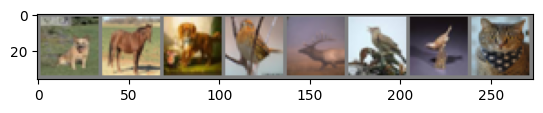

dog   horse dog   bird  deer  bird  bird  cat  


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
net = get_classifier(input_dims=512, output_classes=10, n_layers=1)
net.to(device)

Sequential(
  (0): Linear(in_features=512, out_features=768, bias=True)
  (1): ReLU()
  (2): Linear(in_features=768, out_features=10, bias=True)
  (3): Softmax(dim=None)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        inputs -= inputs.min()
        inputs /= inputs.max()
        outputs = net(get_image_features(inputs).to(device))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            running_loss = 0.0

print('Finished Training')

C:\Users\j2010\PycharmProjects\CADDSeminar_2023\venv\lib\site-packages\torch\nn\modules\container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Finished Training


In [8]:
PATH = '../models/cifar_blip.pth'
torch.save(net.state_dict(), PATH)

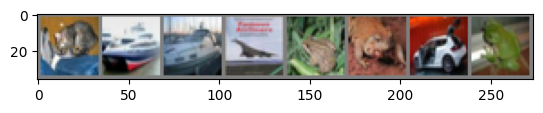

GroundTruth:  cat   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [10]:
net = get_classifier(input_dims=512, output_classes=10, n_layers=1)
net.load_state_dict(torch.load(PATH))
net.to(device)

Sequential(
  (0): Linear(in_features=512, out_features=768, bias=True)
  (1): ReLU()
  (2): Linear(in_features=768, out_features=10, bias=True)
  (3): Softmax(dim=None)
)

In [11]:
images -= images.min()
images /= images.max()
outputs = net(get_image_features(images.to(device)).to(device))

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  truck truck truck truck


In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        images -= images.min()
        images /= images.max()
        outputs = net(get_image_features(images.to(device)).to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

KeyboardInterrupt: 

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        images -= images.min()
        images /= images.max()
        outputs = net(get_image_features(images.to(device)).to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [ ]:
corruption_type = 'gaussian_noise'

dataset = CustomDataset(num_images=1024, corruption_type=corruption_type)

corrupt_dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)

In [2]:
import torch
vitb16 = torch.hub.load('facebookresearch/dino:main', 'dino_vitb16')


Using cache found in /home/omoussa/.cache/torch/hub/facebookresearch_dino_main
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_vitbase16_pretrain/dino_vitbase16_pretrain.pth" to /home/omoussa/.cache/torch/hub/checkpoints/dino_vitbase16_pretrain.pth
100%|██████████| 327M/327M [00:13<00:00, 25.9MB/s] 


In [3]:
vitb16

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (head): Identity()
)